In [94]:
# Install Mecab
!bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)
!pip install mecab-python3
# install Konlpy
!apt-get update
!apt-get install g++ openjdk-8-jdk python-dev python3-dev
!pip3 install JPype1-py3
!pip3 install konlpy
!JAVA_HOME="/usr/lib/jvm/java-8-openjdk-amd64"

mecab-ko is already installed
mecab-ko-dic is already installed
mecab-python is already installed
Done.
Ign:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:6 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Get:7 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:8 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:9 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:12 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Get:

In [95]:
!wget http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
!unzip mallet-2.0.8.zip

--2021-01-21 04:47:00--  http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
Resolving mallet.cs.umass.edu (mallet.cs.umass.edu)... 128.119.246.70
Connecting to mallet.cs.umass.edu (mallet.cs.umass.edu)|128.119.246.70|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16184794 (15M) [application/zip]
Saving to: ‘mallet-2.0.8.zip’

mallet-2.0.8.zip    100%[===================>]  15.43M  9.59MB/s    in 1.6s    

2021-01-21 04:47:02 (9.59 MB/s) - ‘mallet-2.0.8.zip’ saved [16184794/16184794]

Archive:  mallet-2.0.8.zip
   creating: mallet-2.0.8/
   creating: mallet-2.0.8/bin/
  inflating: mallet-2.0.8/bin/classifier2info  
  inflating: mallet-2.0.8/bin/csv2classify  
  inflating: mallet-2.0.8/bin/csv2vectors  
  inflating: mallet-2.0.8/bin/mallet  
  inflating: mallet-2.0.8/bin/mallet.bat  
  inflating: mallet-2.0.8/bin/mallethon  
  inflating: mallet-2.0.8/bin/prepend-license.sh  
  inflating: mallet-2.0.8/bin/svmlight2vectors  
  inflating: mallet-2.0.8/bin/text2classi

In [96]:
import re
import pandas as pd
# import math
# import requests

In [97]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [116]:
import pandas as pd
df=pd.read_csv('/content/drive/Shareddrives/[논문] 내 외국인관광객 유동인구 비교/분석/전처리/명소_외국인_이름정리.csv', encoding='cp949')
df

,name,date,reviews,stars,category,address,lat,lng,foreigner
0,아양교,1921.1.18,"옛 철도 다리가 커피 숍을 열었습니다, 당신은 앉아서 음료와 먹는 얼음을 가지고,...",3,관광 명소,대구광역시 동구 지저동 930,35.890314,128.638354,1
1,아양교,1921.1.18,여유롭게 산책하기에 좋은 곳\n특히 밤에는 반사가 아름답습니다.\n\n\n是個悠閒...,4,관광 명소,대구광역시 동구 지저동 930,35.890314,128.638354,1
2,아양교,1921.1.18,"지하철에서 나와서 아양 철도로가는 길에, 밤의 장면은 정말 아름답습니다. 밤이긴하...",5,관광 명소,대구광역시 동구 지저동 930,35.890314,128.638354,1
3,아양교,1921.1.18,벚꽃이 만발하면 아름다운 벚꽃 터널처럼 보입니다.\n\n\n櫻花盛開時，非常狀觀漂亮...,5,관광 명소,대구광역시 동구 지저동 930,35.890314,128.638354,1
4,아양교,1921.1.18,아름다운 대목장 ~ 대구 아양요 길 ~ ~ 여기에서 사는 많은 사람들을 볼 수있다...,5,관광 명소,대구광역시 동구 지저동 930,35.890314,128.638354,1
...,...,...,...,...,...,...,...,...,...
3542,청라언덕,2019년 7월,천천히 시간을 느낄 수있는 곳입니다. 서문시장에서 도보로 지하철 센트럴 역에가는 길...,5,NaN,대구광역시 달성군 가창면 우록길 206,35.723341,128.647189,1
3543,달성한일우호관,2016년 10월,택시로 갔다 중심부에서 떨어져 있기 때문에 택시로갔습니다. 미터 15000w 이었지...,5,NaN,대구광역시 달성군 가창면 우록길 206,35.723341,128.647189,1
3544,달성한일우호관,2016년 6월,도심에서 멀리 떨어진 전시관은 대구 시티 투어의 수창 노선 (예약 필수매우 비용 효...,5,NaN,대구광역시 달성군 가창면 우록길 206,35.723341,128.647189,1
3545,달성한일우호관,2012년 7월,달성군 한일 우호 관 (김충선 기념관) 대구시의 교외에있는 친구 鹿里라고 마을에 다...,4,NaN,대구광역시 달성군 가창면 우록길 206,35.723341,128.647189,1


In [117]:
df1 = df.get('reviews')
df1

0        옛 철도 다리가 커피 숍을 열었습니다, 당신은 앉아서 음료와 먹는 얼음을 가지고,...
1        여유롭게 산책하기에 좋은 곳\n특히 밤에는 반사가 아름답습니다.\n\n\n是個悠閒...
2        지하철에서 나와서 아양 철도로가는 길에, 밤의 장면은 정말 아름답습니다. 밤이긴하...
3        벚꽃이 만발하면 아름다운 벚꽃 터널처럼 보입니다.\n\n\n櫻花盛開時，非常狀觀漂亮...
4        아름다운 대목장 ~ 대구 아양요 길 ~ ~ 여기에서 사는 많은 사람들을 볼 수있다...
                              ...                        
3542    천천히 시간을 느낄 수있는 곳입니다. 서문시장에서 도보로 지하철 센트럴 역에가는 길...
3543    택시로 갔다 중심부에서 떨어져 있기 때문에 택시로갔습니다. 미터 15000w 이었지...
3544    도심에서 멀리 떨어진 전시관은 대구 시티 투어의 수창 노선 (예약 필수매우 비용 효...
3545    달성군 한일 우호 관 (김충선 기념관) 대구시의 교외에있는 친구 鹿里라고 마을에 다...
3546    한국의 전통 유교. C1 (2013.06.13) 구불 구불 한 산길을 따라 아름다운...
Name: reviews, Length: 3547, dtype: object

In [223]:
galexy_posts=df1.drop_duplicates()

In [224]:
print(galexy_posts.isna().sum()) # 결측치 확인

0


In [225]:
galexy_posts=galexy_posts.fillna(" ")

In [226]:
galexy_posts

0        옛 철도 다리가 커피 숍을 열었습니다, 당신은 앉아서 음료와 먹는 얼음을 가지고,...
1        여유롭게 산책하기에 좋은 곳\n특히 밤에는 반사가 아름답습니다.\n\n\n是個悠閒...
2        지하철에서 나와서 아양 철도로가는 길에, 밤의 장면은 정말 아름답습니다. 밤이긴하...
3        벚꽃이 만발하면 아름다운 벚꽃 터널처럼 보입니다.\n\n\n櫻花盛開時，非常狀觀漂亮...
4        아름다운 대목장 ~ 대구 아양요 길 ~ ~ 여기에서 사는 많은 사람들을 볼 수있다...
                              ...                        
3542    천천히 시간을 느낄 수있는 곳입니다. 서문시장에서 도보로 지하철 센트럴 역에가는 길...
3543    택시로 갔다 중심부에서 떨어져 있기 때문에 택시로갔습니다. 미터 15000w 이었지...
3544    도심에서 멀리 떨어진 전시관은 대구 시티 투어의 수창 노선 (예약 필수매우 비용 효...
3545    달성군 한일 우호 관 (김충선 기념관) 대구시의 교외에있는 친구 鹿里라고 마을에 다...
3546    한국의 전통 유교. C1 (2013.06.13) 구불 구불 한 산길을 따라 아름다운...
Name: reviews, Length: 3466, dtype: object

In [227]:
from konlpy.tag import Mecab
tagger = Mecab('/usr/local/lib/mecab/dic/mecab-ko-dic')

불용어 사전

In [228]:
galexy_stop_words = "대구, 제공, 번역, 한국, 원문, 방문, 시간, 무료, 이곳, 사람, 장소, 여기, 우리, 때문, 그것, 하나,생각,정도,거기,이것,동안,가지"
#galexy_stop_words = df1_stop_words.split("")
print(galexy_stop_words)

대구, 제공, 번역, 한국, 원문, 방문, 시간, 무료, 이곳, 사람, 장소, 여기, 우리, 때문, 그것, 하나,생각,정도,거기,이것,동안,가지


불용어를 제외하여 형태소 분석 수행
추출하는 명사 중에서 불용어에 포함되지 않는 텍스틈나 추출하여 저장

In [229]:
words =[]
for post in galexy_posts:
  words.extend(tagger.pos(post))
words[0:30]

[('옛', 'MM'),
 ('철도', 'NNG'),
 ('다리', 'NNG'),
 ('가', 'JKS'),
 ('커피', 'NNG'),
 ('숍', 'NNG'),
 ('을', 'JKO'),
 ('열', 'VV'),
 ('었', 'EP'),
 ('습니다', 'EF'),
 (',', 'SC'),
 ('당신', 'NP'),
 ('은', 'JX'),
 ('앉', 'VV'),
 ('아서', 'EC'),
 ('음료', 'NNG'),
 ('와', 'JKB'),
 ('먹', 'VV'),
 ('는', 'ETM'),
 ('얼음', 'NNG'),
 ('을', 'JKO'),
 ('가지', 'VV'),
 ('고', 'EC'),
 (',', 'SC'),
 ('또한', 'MAJ'),
 ('한국', 'NNP'),
 ('스와', 'NNP'),
 ('다우', 'NNG'),
 ('촬영', 'NNG'),
 ('장면', 'NNG')]

핵심어 빈도 분석 : 단어빈도가 높은 상위 30개 추출
dict함수를 통해 저장 

In [230]:
##TF-IDF계산
from sklearn.feature_extraction.text import TfidfVectorizer
galexy_tfidv = TfidfVectorizer().fit(galexy_top_nouns)
galexy_tfidv.transform(galexy_posts).toarray()

#print(df1_tfidv.transform(galexy_posts).toarray())

# tfidfv = TfidfVectorizer().fit(corpus)
# print(tfidfv.transform(corpus).toarray())

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [231]:
##테이블형태로 살펴보기
pd.DataFrame(galexy_tfidv.transform(galexy_posts).toarray())
df2=pd.DataFrame(galexy_tfidv.transform(galexy_posts).toarray())
df2[100:110]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,5504,5505,5506,5507,5508,5509,5510,5511,5512,5513,5514,5515,5516,5517,5518,5519,5520,5521,5522,5523,5524,5525,5526,5527,5528,5529,5530,5531,5532,5533,5534,5535,5536,5537,5538,5539,5540,5541,5542,5543
100,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
102,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
103,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
104,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
105,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
106,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
107,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
108,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
109,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [232]:
# #유사어를 통폐합한 후 명사 빈도수 계산
# df1_nouns_counter = Counter(df1_nouns)
# df1_nouns_counter[''] += df1_nouns_counter['스마트']
# df1_nouns_counter.pop('스마트')##'스마트'를 '스마트폰'으로 간주하여 빈도수 계산하고 스마트는 제외

# df1_nouns_counter['삼성'] += df1_nouns_counter['삼성전자']
# df1_nouns_counter.pop('삼성전자')

# num_top_nouns =30
# df1_top_nouns = df1_nouns_counter.most_common(num_top_nouns)
# df1_top_nouns

In [233]:
#print(galexy_top_nouns)

리뷰를 문장으로 나누기

In [169]:
# galexy_sentences = []
# for post in galexy_posts:
#   galexy_sentences.extend(re.split(': |\?|\!', post))
# galexy_sentences[0:10]

In [170]:
# galexy_id2word = { i: w for i, w in enumerate(galexy_top_nouns_keys())}
# galexy_id2word

인적행렬 생성

In [171]:
# ##인적행렬 생성
# #상위 단어들에 대해서 상위갯수만큼 인접행렬 만들고 word2id사용 가중치가 0이상이면 서로 연결
# import numpy as np
# df1_adjacent_matrix = np.zeros((num_top_nouns, num_top_nouns), int)
# for sentence in galexy_sentences_nouns:
#     for wi, i in df1_word2id.items():
#         if wi in sentence:
#             for wj, j in df1_word2id.items():
#                 if i !=j and wj in sentence:
#                     df1_adjacent_matrix[i][j] += 1
# df1_adjancent_matrix

In [172]:
# galexy_network = nx.from_numpy_matrix(galexy_adjacent_matrix)
# list(galexy_network.adjacency())

In [234]:
import re 
import networkx as nx

In [235]:
galexy_nouns = []
for post in galexy_posts:
    if type(post) == str:
        for noun in tagger.nouns(post):
            if noun not in galexy_stop_words and len(noun) > 1 :
                galexy_nouns.append(noun)
                
galexy_nouns[0:30]

['철도',
 '다리',
 '커피',
 '당신',
 '음료',
 '얼음',
 '스와',
 '다우',
 '촬영',
 '장면',
 '鐵道',
 '開設',
 '下來',
 '場景',
 '여유',
 '산책',
 '반사',
 '散步',
 '地方',
 '倒影',
 '點燈',
 '時間',
 '지하철',
 '아양',
 '철도',
 '장면',
 '철도',
 '다리',
 '이후',
 '벚꽃']

In [236]:
##상위 20개 명사 추출

In [237]:
##명사빈도계산
from collections import Counter #상위 30개 명사
num_top_nouns = 30
galexy_nouns_counter=Counter(galexy_nouns)
galexy_top_nouns = galexy_nouns_counter.most_common(num_top_nouns)
galexy_top_nouns[:100]

[('공원', 585),
 ('박물관', 365),
 ('시장', 345),
 ('버스', 290),
 ('케이블카', 252),
 ('음식', 250),
 ('역사', 231),
 ('사진', 228),
 ('도시', 227),
 ('거리', 226),
 ('가치', 222),
 ('교회', 204),
 ('지역', 203),
 ('사원', 198),
 ('산책', 182),
 ('아이', 181),
 ('전망', 177),
 ('흥미', 172),
 ('타워', 171),
 ('건물', 153),
 ('근처', 141),
 ('등산', 136),
 ('주변', 132),
 ('전통', 127),
 ('경험', 126),
 ('영어', 121),
 ('풍경', 118),
 ('카페', 116),
 ('당신', 114),
 ('지하철', 114)]

In [252]:

# #유사어를 통폐합한 후 명사 빈도수 계산
# galexy_nouns_counter = Counter(galexy_nouns)
# galexy_nouns_counter['아이스링크장'] += galexy_nouns_counter['링크']
# galexy_nouns_counter.pop('링크')##'스마트'를 '스마트폰'으로 간주하여 빈도수 계산하고 스마트는 제외


# galexy_nouns_counter['아이스스케이트'] += galexy_nouns_counter['스케이트','스케이팅']
# galexy_nouns_counter.pop('스케이트장','스케이팅')##'

# galexy_nouns_counter['팔공산'] += galexy_nouns_counter['공산']
# galexy_nouns_counter.pop('공산')
# galexy_nouns.append(galexy_nouns_counter)

# num_top_nouns =20
# df1_top_nouns = df1_nouns_counter.most_common(num_top_nouns)
# df1_top_nouns

galexy_nouns['아이스링크장'] += galexy_nouns['링크']
galexy_nouns.pop('링크')



TypeError: ignored

In [239]:
print(galexy_nouns)

['철도', '다리', '커피', '당신', '음료', '얼음', '스와', '다우', '촬영', '장면', '鐵道', '開設', '下來', '場景', '여유', '산책', '반사', '散步', '地方', '倒影', '點燈', '時間', '지하철', '아양', '철도', '장면', '철도', '다리', '이후', '벚꽃', '벚꽃', '地鐵', '出來', '夜景', '通過', '鐵道', '櫻花', '櫻花', '벚꽃', '만발', '벚꽃', '터널', '櫻花', '盛開', '非常', '櫻花', '隧道', '대목장', '양요', '드라마', '커피', '공원', '場景', '對面', '公園', '브릿지', '산책', '인근', '커피', '커피', '편리', '명소', '주말', '공휴일', '주차', '아양교', '철도', '폐지', '이후', '운영', '중단', '도서관', '전환', '현재', '도서관', '철도', '다리', '철교', '야경', '중간', '부분', '전시장', '커피', '이야기', '사진', '신천', '벚꽃', '일몰', '뭔가', '櫻花', '盛開', '夕陽', '풍경', '저녁', '以前', '道路', '風景', '드라마', '장면', '촬영', '경우', '주민', '편의', '다리', '場景', '感覺', '方便', '居民', '드라마', '장면', '일몰', '場景', '夕陽', '벚꽃', '시즌', '벚꽃', '櫻花', '到滿', '櫻花', '지역', '전형', '강변', '산책로', '커피', '철도', '건널목', '역사', '재미', '다리', '조명', '點燈', '無聊', '음료', '커피', '산책', '경치', '에피소드', '촬영', '산책', '하하', '散步', '去處', '벚꽃', '분위기', '레저', '櫻花', '散步', '地方', '다리', '기찻길', '다리', '내부', '카페', '다리', '공항', '동대구역', '다리', '바닥', '유리', '경치', '아무것', '특별', '特別', 

In [247]:
galexy_top_nouns = dict(galexy_nouns) #사전형태로 변환

TypeError: ignored

In [216]:
print(galexy_top_nouns)

{'철도': 14, '다리': 55, '커피': 72, '당신': 114, '음료': 29, '얼음': 3, '스와': 2, '다우': 1, '촬영': 57, '장면': 19, '鐵道': 2, '開設': 1, '下來': 2, '場景': 7, '여유': 26, '산책': 182, '반사': 2, '散步': 8, '地方': 108, '倒影': 1, '點燈': 2, '時間': 25, '지하철': 114, '아양': 2, '이후': 29, '벚꽃': 85, '地鐵': 4, '出來': 2, '夜景': 5, '通過': 2, '櫻花': 28, '만발': 3, '터널': 2, '盛開': 4, '非常': 24, '隧道': 1, '대목장': 1, '양요': 1, '드라마': 20, '공원': 585, '對面': 5, '公園': 38, '브릿지': 2, '인근': 21, '편리': 54, '명소': 93, '주말': 35, '공휴일': 6, '주차': 28, '아양교': 3, '폐지': 1, '운영': 8, '중단': 4, '도서관': 17, '전환': 3, '현재': 12, '철교': 11, '야경': 56, '중간': 17, '부분': 25, '전시장': 5, '이야기': 26, '사진': 228, '신천': 1, '일몰': 17, '뭔가': 12, '夕陽': 5, '풍경': 118, '저녁': 74, '以前': 7, '道路': 3, '風景': 45, '경우': 81, '주민': 21, '편의': 4, '感覺': 17, '方便': 11, '居民': 1, '시즌': 27, '到滿': 1, '지역': 203, '전형': 12, '강변': 4, '산책로': 47, '건널목': 1, '역사': 231, '재미': 93, '조명': 46, '無聊': 8, '경치': 107, '에피소드': 3, '하하': 1, '去處': 11, '분위기': 91, '레저': 9, '기찻길': 1, '내부': 53, '카페': 116, '공항': 33, '동대구역': 8, '바닥': 10, '유리': 1

In [217]:
##상위 단어 top_nouns에 대해서는 key에 해당하는 단어, value 에 해당하는 id를 넣어 딕서녀리형태로 저장
df1_word2id = {w: i for i, w in enumerate(galexy_top_nouns.keys())}
df1_word2id

{'철도': 0,
 '다리': 1,
 '커피': 2,
 '당신': 3,
 '음료': 4,
 '얼음': 5,
 '스와': 6,
 '다우': 7,
 '촬영': 8,
 '장면': 9,
 '鐵道': 10,
 '開設': 11,
 '下來': 12,
 '場景': 13,
 '여유': 14,
 '산책': 15,
 '반사': 16,
 '散步': 17,
 '地方': 18,
 '倒影': 19,
 '點燈': 20,
 '時間': 21,
 '지하철': 22,
 '아양': 23,
 '이후': 24,
 '벚꽃': 25,
 '地鐵': 26,
 '出來': 27,
 '夜景': 28,
 '通過': 29,
 '櫻花': 30,
 '만발': 31,
 '터널': 32,
 '盛開': 33,
 '非常': 34,
 '隧道': 35,
 '대목장': 36,
 '양요': 37,
 '드라마': 38,
 '공원': 39,
 '對面': 40,
 '公園': 41,
 '브릿지': 42,
 '인근': 43,
 '편리': 44,
 '명소': 45,
 '주말': 46,
 '공휴일': 47,
 '주차': 48,
 '아양교': 49,
 '폐지': 50,
 '운영': 51,
 '중단': 52,
 '도서관': 53,
 '전환': 54,
 '현재': 55,
 '철교': 56,
 '야경': 57,
 '중간': 58,
 '부분': 59,
 '전시장': 60,
 '이야기': 61,
 '사진': 62,
 '신천': 63,
 '일몰': 64,
 '뭔가': 65,
 '夕陽': 66,
 '풍경': 67,
 '저녁': 68,
 '以前': 69,
 '道路': 70,
 '風景': 71,
 '경우': 72,
 '주민': 73,
 '편의': 74,
 '感覺': 75,
 '方便': 76,
 '居民': 77,
 '시즌': 78,
 '到滿': 79,
 '지역': 80,
 '전형': 81,
 '강변': 82,
 '산책로': 83,
 '건널목': 84,
 '역사': 85,
 '재미': 86,
 '조명': 87,
 '無聊': 88,
 '경치': 89,
 '에피소드': 

In [251]:
galexy_nouns

['철도',
 '다리',
 '커피',
 '당신',
 '음료',
 '얼음',
 '스와',
 '다우',
 '촬영',
 '장면',
 '鐵道',
 '開設',
 '下來',
 '場景',
 '여유',
 '산책',
 '반사',
 '散步',
 '地方',
 '倒影',
 '點燈',
 '時間',
 '지하철',
 '아양',
 '철도',
 '장면',
 '철도',
 '다리',
 '이후',
 '벚꽃',
 '벚꽃',
 '地鐵',
 '出來',
 '夜景',
 '通過',
 '鐵道',
 '櫻花',
 '櫻花',
 '벚꽃',
 '만발',
 '벚꽃',
 '터널',
 '櫻花',
 '盛開',
 '非常',
 '櫻花',
 '隧道',
 '대목장',
 '양요',
 '드라마',
 '커피',
 '공원',
 '場景',
 '對面',
 '公園',
 '브릿지',
 '산책',
 '인근',
 '커피',
 '커피',
 '편리',
 '명소',
 '주말',
 '공휴일',
 '주차',
 '아양교',
 '철도',
 '폐지',
 '이후',
 '운영',
 '중단',
 '도서관',
 '전환',
 '현재',
 '도서관',
 '철도',
 '다리',
 '철교',
 '야경',
 '중간',
 '부분',
 '전시장',
 '커피',
 '이야기',
 '사진',
 '신천',
 '벚꽃',
 '일몰',
 '뭔가',
 '櫻花',
 '盛開',
 '夕陽',
 '풍경',
 '저녁',
 '以前',
 '道路',
 '風景',
 '드라마',
 '장면',
 '촬영',
 '경우',
 '주민',
 '편의',
 '다리',
 '場景',
 '感覺',
 '方便',
 '居民',
 '드라마',
 '장면',
 '일몰',
 '場景',
 '夕陽',
 '벚꽃',
 '시즌',
 '벚꽃',
 '櫻花',
 '到滿',
 '櫻花',
 '지역',
 '전형',
 '강변',
 '산책로',
 '커피',
 '철도',
 '건널목',
 '역사',
 '재미',
 '다리',
 '조명',
 '點燈',
 '無聊',
 '음료',
 '커피',
 '산책',
 '경치',
 '에피소드',
 '촬영',
 '산책',
 '하하',
 '散步

토픽모델링

In [218]:
#######토픽모델링##########
##명사추출하기
galexy_nouns = []
nouns = []
for post in galexy_posts:
    if type(post) == str:
        for noun in tagger.nouns(post):
            if noun not in galexy_stop_words and len(noun) > 1:
                nouns.append(noun)
        galexy_nouns.append(nouns)
    else:
        galexy_nouns_append(['nouns'])

galexy_nouns[0:10]

[['철도',
  '다리',
  '커피',
  '당신',
  '음료',
  '얼음',
  '스와',
  '다우',
  '촬영',
  '장면',
  '鐵道',
  '開設',
  '下來',
  '場景',
  '여유',
  '산책',
  '반사',
  '散步',
  '地方',
  '倒影',
  '點燈',
  '時間',
  '지하철',
  '아양',
  '철도',
  '장면',
  '철도',
  '다리',
  '이후',
  '벚꽃',
  '벚꽃',
  '地鐵',
  '出來',
  '夜景',
  '通過',
  '鐵道',
  '櫻花',
  '櫻花',
  '벚꽃',
  '만발',
  '벚꽃',
  '터널',
  '櫻花',
  '盛開',
  '非常',
  '櫻花',
  '隧道',
  '대목장',
  '양요',
  '드라마',
  '커피',
  '공원',
  '場景',
  '對面',
  '公園',
  '브릿지',
  '산책',
  '인근',
  '커피',
  '커피',
  '편리',
  '명소',
  '주말',
  '공휴일',
  '주차',
  '아양교',
  '철도',
  '폐지',
  '이후',
  '운영',
  '중단',
  '도서관',
  '전환',
  '현재',
  '도서관',
  '철도',
  '다리',
  '철교',
  '야경',
  '중간',
  '부분',
  '전시장',
  '커피',
  '이야기',
  '사진',
  '신천',
  '벚꽃',
  '일몰',
  '뭔가',
  '櫻花',
  '盛開',
  '夕陽',
  '풍경',
  '저녁',
  '以前',
  '道路',
  '風景',
  '드라마',
  '장면',
  '촬영',
  '경우',
  '주민',
  '편의',
  '다리',
  '場景',
  '感覺',
  '方便',
  '居民',
  '드라마',
  '장면',
  '일몰',
  '場景',
  '夕陽',
  '벚꽃',
  '시즌',
  '벚꽃',
  '櫻花',
  '到滿',
  '櫻花',
  '지역',
  '전형',
  '강변',
  '산책로',
  '

In [248]:
!pip install gensim

In [250]:
from gensim import corpora
dictionary = corpora.Dictionary([galexy_nouns])

corpus = [dictionary.doc2bow(text) for text in galexy_nouns]
corpus[1]

TypeError: ignored

명사에 대해서 bigram 형태로 만들어 사용한다. 그리고 bigram으로 묶인 명사에 대해서 trigram을 만들어 사용한다
두개의 복합어 : bigram 
세개의 복합어 : trigram 으로 묶는 것 

In [242]:
# import gensim
# # galexy_bigram = gensim.models.Phrases(galexy_nouns)
# # # galexy_trigram = gensim.models.Phrases(galexy_bigram[galexy_nouns])
# # galexy_bigram_model = gensim.models.phrases.Phraser(galexy_bigram)
# # # #galexy_trigram_model = gensim.models.phrases.Phraser(galexy_trigram)

# # # # Build the bigram and trigram models
# galexy_bigram = gensim.models.Phrases(galexy_nouns, min_count=5, threshold=100) # higher threshold fewer phrases.
# # # #galexy_trigram = gensim.models.Phrases(galexy_bigram[galexy_nouns], threshold=100)  

# # # # Faster way to get a sentence clubbed as a trigram/bigram
# galexy_bigram_model = gensim.models.phrases.Phraser(galexy_bigram)
# # # #galexy_trigram_model = gensim.models.phrases.Phraser(galexy_trigram)

In [243]:
# from gensim import corpora
# galexy_bigram_document = [galexy_bigram_model[nouns] for nouns in galexy_nouns]
# galexy_bigram_document[100]
# # # #bigram어떤거있는가

['경', '우']

In [246]:
# from gensim import corpora
# galexy_id2word = corpora.Dictionary(galexy_bigram_document)
# galexy_corpus = [galexy_id2word.doc2bow(doc) for doc in galexy_bigram_document]
# galexy_corpus[0]
galexy_id2word = corpora.Dictionary(galexy_nouns)
galexy_corpus = (galexy_id2word.doc2bow(doc) for doc in galexy_nouns)
galexy_corpus
# # ##bigram문서에 대해서 id와 word로 매핑된 딕셔너리를 생성 그리고 doc2bow함수를 통해서 (단어, 빈도수)형태로 만들어줌

TypeError: ignored

In [198]:
# galexy_corpus_num = galexy_corpus[1000]
# for i in range(len(galexy_corpus_num)):
#     print("Word {} (\"{}\") appears {} time.".format(galexy_corpus_num[i][0],dictionary[galexy_corpus_num[i][0]],galexy_corpus_num[i][1]))

NameError: ignored

In [245]:
galexy_id2word[181]#n번째가 무엇인지 확인

'現'

Topic Coherence 계산
토픽모델링을 수행함에 있어서 적절한 토픽의 갯수를 찾는 것이 중요
2부터 9까지 값으 ㄹ늘려가면서 lda모델을 생성하여 각모델의 coherence를 계산한다.
그리고 적절한 토픽의 수는 토픽의 개수를 늘려가며 높은 coherence score를 가지는 값으로 결정한다.

In [ ]:
# mallet_path = "/content/drive/MyDrive/mallet-2.0.8/bin/mallet" # update this path "/content/drive/MyDrive/mallet-2.0.8/bin/mallet"
# import os

# os.environ['MALLET_HOME'] = '/content/drive/MyDrive/mallet-2.0.8/bin/mallet'

# ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=galexy_corpus, num_topics=10, id2word=galexy_id2word)

# pprint(ldamallet.show_topics(formatted=False))

# # Compute Coherence Score
# coherence_model_ldamallet = CoherenceModel(model=ldamallet, texts=galexy_bigram_document, dictionary=galexy_id2word, coherence='c_v')
# coherence_ldamallet = coherence_model_ldamallet.get_coherence()
# print('\nCoherence Score: ', coherence_ldamallet)

In [200]:
import gensim

In [201]:
##Topic Coherence계산
from gensim.models import CoherenceModel

galexy_coherence_score=[]
models = []
#perplexity_values = []
for i in range(2,8):
    model = gensim.models.ldamodel.LdaModel(corpus=galexy_corpus, id2word=galexy_id2word, num_topics=i)
    coherence_model = CoherenceModel(model, texts=galexy_nouns_counter, dictionary=galexy_id2word, coherence='c_v')
    
    coherence_lda = coherence_model.get_coherence()
    #bound = lda_model.log_perplexity(corpus)
    #perplexity_values.append(2**(-1*bound))
    galexy_coherence_score.append(coherence_lda)
    models.append(model)
    print('n=',i,'\nCoherence Score: ', coherence_lda)

#np_per = np.array(perplexity_values)
#perplexity_diff_values = (np_per[:-1]-np_per[1:]).tolist()

n= 2 
Coherence Score:  0.5472538143309305
n= 3 
Coherence Score:  0.5317844045334189
n= 4 
Coherence Score:  0.577837788595589
n= 5 
Coherence Score:  0.5891157738204686
n= 6 
Coherence Score:  0.6052517784823456
n= 7 
Coherence Score:  0.6279491897666193


토픽의 갯수가 증가할수록 계속적으로 coherence score가 증가하는 추이를 보인다. 증가 추이에서 가장 높은 값을 가지다가 낮아지기 시작하는 지점이 적절한 토픽의 갯수로 판단하고 LDA모델을 생성한다

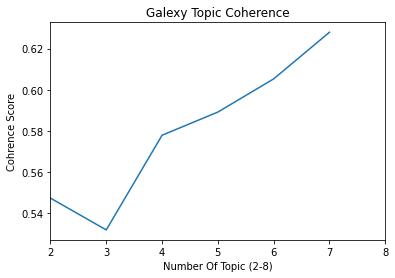

In [202]:
##차트로 나타내서 살펴보기
import matplotlib.pyplot as plt
import numpy

k=[]
for i in range(2,8):
    k.append(i)

x=numpy.array(k)
y=numpy.array(galexy_coherence_score)
plt.title('Galexy Topic Coherence')
plt.plot(x,y)
plt.xlim(2,8)
plt.xlabel('Number Of Topic (2-8)')
plt.ylabel('Cohrence Score')
plt.show()

# y=numpy.array(perplexity_values)
# plt.title('Galexy Topic Coherence')
# plt.plot(x,y)
# plt.xlim(2,10)
# plt.xlabel('Number Of Topic (2-10)')
# plt.ylabel('Cohrence Score')
# plt.show()

# y=numpy.array(perplexity_diff_values)
# plt.title('Galexy Topic Coherence')
# plt.plot(x,y)
# plt.xlim(2,9)
# plt.xlabel('Number Of Topic (2-10)')
# plt.ylabel('Cohrence Score')
# plt.show()

In [203]:
galexy_model = gensim.models.ldamodel.LdaModel(corpus=galexy_corpus, id2word=galexy_id2word, num_topics=6, passes = 15)
topics = galexy_model.print_topics(num_words=5)
for topic in topics:
    print(topic)
#galexy_model.print_topics()

# ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=15) ## passes는 알고리즘의 동작 횟수를 말하는데, 알고리즘이 결정하는 토픽의 값이 적절히 수렴할 수 있도록 충분히 적당한 횟수를 정해주면 됩니다. 여기서는 총 15회를 수행하였습니다
# topics = ldamodel.print_topics(num_words=5)
# for topic in topics:
#     print(topic)

(0, '0.079*"기" + 0.076*"이" + 0.037*"비" + 0.028*"경" + 0.025*"양"')
(1, '0.039*"자" + 0.036*"수" + 0.033*"전" + 0.032*"상" + 0.029*"대"')
(2, '0.079*"스" + 0.048*"트" + 0.037*"아" + 0.031*"이" + 0.024*"로"')
(3, '0.058*"지" + 0.032*"가" + 0.031*"사" + 0.031*"구" + 0.025*"화"')
(4, '0.043*"장" + 0.038*"리" + 0.035*"도" + 0.024*"일" + 0.022*"유"')
(5, '0.047*"마" + 0.035*"어" + 0.033*"조" + 0.021*"라" + 0.021*"명"')


In [ ]:
!pip install pyLDAvis

     |████████████████████████████████| 1.6 MB 1.4 MB/s eta 0:00:01     |██████████████████▉             | 952 kB 1.4 MB/s eta 0:00:01
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97712 sha256=48cdadf15fccfc0152720604ed7485cd0d04d93171973a8871227b85c70a5d97
  Stored in directory: /Users/ji_brisbane/Library/Caches/pip/wheels/31/8c/a0/24a443892f2134e691d59c8c6c35e19821e02f85e49871f8fd
Successfully built pyLDAvis


pyLDAvis를 이용한 LDA시각화 IDM
LDA를 시각화하기 위해 import 
실제 생성한 모델을 가지고 토픽간 거리지도IDM으로 시각화한다.

In [ ]:
!pip install pyLDAvis

     |████████████████████████████████| 1.6MB 13.1MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97712 sha256=987ac0139d208a1fd3a0167b3737974aabc746c462e855d9961030401c0712d2
  Stored in directory: /root/.cache/pip/wheels/98/71/24/513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
Successfully built pyLDAvis


In [ ]:
import pyLDAvis
import pyLDAvis.gensim as gensimvis
prepared_data = gensimvis.prepare(galexy_model, galexy_corpus, galexy_id2word)
pyLDAvis.display(prepared_data)

##시각화할수있음